# **Project 2: Smoking Status Identification from Clinical Notes**

# Step 1: Import Data

---



In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Training Data

In [137]:
#Joan
smoking_status_train_file = "/content/drive/MyDrive/MassiveHealthFund/project/smoking_status_train.xml"

In [138]:
#Yuktha
smoking_status_train_file = "/content/drive/MyDrive/HIDS 6001 Project/Dataset/smoking_status_train.xml"

In [139]:
#AJ
smoking_status_train_file = "/content/drive/MyDrive/Smoking_project/smoking_status_train.xml"

In [140]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse(smoking_status_train_file)
root = tree.getroot()

# Define lists to store data
record_list = []
text_list = []

# Extract data from XML
for record in root.findall('RECORD'):
    record_id = record.get('ID')
    smoking_status = record.find('SMOKING').get('STATUS')

    # Extract text data from the <TEXT> element
    text_data = record.find('TEXT').text.strip()

    # Append data to the respective lists
    record_list.append({'Record_ID': record_id, 'Smoking_Status': smoking_status})
    text_list.append(text_data)

# Create DataFrames
record_df = pd.DataFrame(record_list)
text_df = pd.DataFrame({'Text': text_list})

# Concatenate DataFrames
smoking_status_train_df = pd.concat([record_df, text_df], axis=1)

# Display the resulting DataFrame
print(smoking_status_train_df)


    Record_ID  Smoking_Status  \
0         641  CURRENT SMOKER   
1         643  CURRENT SMOKER   
2         681  CURRENT SMOKER   
3         704  CURRENT SMOKER   
4         757  CURRENT SMOKER   
..        ...             ...   
393       401         UNKNOWN   
394       403         UNKNOWN   
395       416         UNKNOWN   
396       417         UNKNOWN   
397       419         UNKNOWN   

                                                  Text  
0    977146916\nHLGMC\n2878891\n022690\n01/27/1997 ...  
1    026738007\nCMC\n15319689\n3/25/1998 12:00:00 A...  
2    071962960\nBH\n4236518\n417454\n12/10/2001 12:...  
3    418520250\nNVH\n61562872\n3/11/1995 12:00:00 A...  
4    301443520\nCTMC\n49020928\n448922\n1/11/1990 1...  
..                                                 ...  
393  917989835 RWH\n5427551\n405831\n9660879\n01/09...  
394  817406016 RWH\n3154334\n554691\n3547577\n7/6/2...  
395  517502848 ELMVH\n18587541\n6634152\n12/12/2004...  
396  895872725 ELMVH\n99080881\n9

In [141]:
smoking_status_train_df.head()
smoking_status_train_df.shape

(398, 3)

### Import Testing Data

In [142]:
#Joan
smoking_status_test_file = "/content/drive/MyDrive/MassiveHealthFund/project/smoking_status_test.xml"

In [143]:
#Yuktha
smoking_status_test_file = "/content/drive/MyDrive/HIDS 6001 Project/Dataset/smoking_status_test.xml"

In [144]:
#AJ
smoking_status_test_file = "/content/drive/MyDrive/Smoking_project/smoking_status_test.xml"

In [145]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse(smoking_status_test_file)
root = tree.getroot()

# Define lists to store data
record_list = []
text_list = []

# Extract data from XML
for record in root.findall('RECORD'):
    record_id = record.get('ID')


    # Extract text data from the <TEXT> element
    text_data = record.find('TEXT').text.strip()

    # Append data to the respective lists
    record_list.append({'Record_ID': record_id})
    text_list.append(text_data)

# Create DataFrames
record_df = pd.DataFrame(record_list)
text_df = pd.DataFrame({'Text': text_list})

# Concatenate DataFrames
smoking_status_test_df = pd.concat([record_df, text_df], axis=1)

# Display the resulting DataFrame
print(smoking_status_test_df)


    Record_ID                                               Text
0         660  156406283\nHLGMC\n7213645\n64723/51cy\n5/28/19...
1         845  487197293\nPUOMC\n2466262\n408602\n1976045\n4/...
2         515  176318078\nFIH\n4189699\n28872/d70h\n094756\n1...
3         562  245096078\nFIH\n9174858\n12/February\n997359\n...
4         633  237073320\nFIH\n9746390\n797120\n251605\n01/26...
..        ...                                                ...
99        487  178557034 RWH\n6914544\n174533\n944266\n12/16/...
100       488  522011500 ELMVH\n98638774\n324573\n7/28/2000 1...
101       492  020916369 ELMVH\n07813686\n4888155\n06/21/2004...
102       493  888428725 RWH\n0712675\n695770\n6153969\n11/4/...
103       500  844970557 RWH\n4822461\n736093\n8962225\n11/16...

[104 rows x 2 columns]


In [146]:
smoking_status_test_df.head()

,Record_ID,Text
0,660,156406283\nHLGMC\n7213645\n64723/51cy\n5/28/19...
1,845,487197293\nPUOMC\n2466262\n408602\n1976045\n4/...
2,515,176318078\nFIH\n4189699\n28872/d70h\n094756\n1...
3,562,245096078\nFIH\n9174858\n12/February\n997359\n...
4,633,237073320\nFIH\n9746390\n797120\n251605\n01/26...


### Importing Testing Data with Labels

In [147]:
#Joan
smoking_status_test_with_labels_file = "/content/drive/MyDrive/MassiveHealthFund/project/smoking_status_test_with_labels.xml"

In [148]:
#AJ
smoking_status_test_with_labels_file = "/content/drive/MyDrive/Smoking_project/smoking_status_test_with_labels.xml"

In [149]:
#Yuktha

In [150]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse(smoking_status_test_with_labels_file)
root = tree.getroot()

# Define lists to store data
record_list = []
text_list = []

# Extract data from XML
for record in root.findall('RECORD'):
    record_id = record.get('ID')
    smoking_status = record.find('SMOKING').get('STATUS')

    # Extract text data from the <TEXT> element
    text_data = record.find('TEXT').text.strip()

    # Append data to the respective lists
    record_list.append({'Record_ID': record_id, 'Smoking_Status': smoking_status})
    text_list.append(text_data)

# Create DataFrames
record_df = pd.DataFrame(record_list)
text_df = pd.DataFrame({'Text': text_list})

# Concatenate DataFrames
smoking_status_test_labels_df = pd.concat([record_df, text_df], axis=1)

# Display the resulting DataFrame
print(smoking_status_test_labels_df)


    Record_ID  Smoking_Status  \
0         660     PAST SMOKER   
1         845  CURRENT SMOKER   
2         515  CURRENT SMOKER   
3         562  CURRENT SMOKER   
4         633  CURRENT SMOKER   
..        ...             ...   
99        487         UNKNOWN   
100       488         UNKNOWN   
101       492         UNKNOWN   
102       493         UNKNOWN   
103       500         UNKNOWN   

                                                  Text  
0    156406283\nHLGMC\n7213645\n64723/51cy\n5/28/19...  
1    487197293\nPUOMC\n2466262\n408602\n1976045\n4/...  
2    176318078\nFIH\n4189699\n28872/d70h\n094756\n1...  
3    245096078\nFIH\n9174858\n12/February\n997359\n...  
4    237073320\nFIH\n9746390\n797120\n251605\n01/26...  
..                                                 ...  
99   178557034 RWH\n6914544\n174533\n944266\n12/16/...  
100  522011500 ELMVH\n98638774\n324573\n7/28/2000 1...  
101  020916369 ELMVH\n07813686\n4888155\n06/21/2004...  
102  888428725 RWH\n0712675\n6957

# Step 2: Create Reduced Text Column

### 1. Packages

In [151]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Function for reducing

Identifying sentences containing keywords associated with smoking from a given text:

 **1) Regular Expression (smoking_patt):**

Defines a regular expression pattern (smoking_patt) that matches words related to smoking such as "smoke," "cigarette," "cigars," "pipes," "tobacco," and "nicotine."

 **2) Function get_reduced_text(text):**

Takes the text as an input and check wether it's empty or not. Tokenizes the line into sentences using sent_tokenize from NLTK. Searches for sentences that match the smoking-related pattern (smoking_patt) using re.search.

If a sentence contains a match, it adds that sentence to the sents list.
If no sentences match the pattern, it returns the string "no relevant info."
If there are matching sentences, it returns these sentences joined by newline characters.


In [152]:
smoking_patt = r'\b(smok[a-z]+|ciggaretes?|cigars?|pipes?|packs?|tobaccos?|nicotine)\b'
def get_reduced_text(text):
  sents = []
  if not text or text == "":
    return None
  lines = text.splitlines()
  for line in lines:
    line = line.strip()
    line_sents = sent_tokenize(line)
    for line_sent in line_sents:
      if re.search(smoking_patt, line_sent, re.I|re.M): sents.append(line_sent)
  if not sents: return "no relevnt info"
  return "\n".join(sents)

Training Set

In [153]:
# applying the smoking_patt and adding the result into the new column in smoking_status_train_df
smoking_status_train_df['Reduced Text'] = smoking_status_train_df['Text'].apply(get_reduced_text)

In [154]:
smoking_status_train_df.head()

,Record_ID,Smoking_Status,Text,Reduced Text
0,641,CURRENT SMOKER,977146916\nHLGMC\n2878891\n022690\n01/27/1997 ...,"Drinks ginger brandy to excess , pipe and ciga..."
1,643,CURRENT SMOKER,026738007\nCMC\n15319689\n3/25/1998 12:00:00 A...,The patient has a 20 pack-year smoking history .
2,681,CURRENT SMOKER,071962960\nBH\n4236518\n417454\n12/10/2001 12:...,HAS BEEN SMOKING APPROXIMATELY 10 CIGARETTES A...
3,704,CURRENT SMOKER,418520250\nNVH\n61562872\n3/11/1995 12:00:00 A...,Smoker for greater than 100 pack years ( 3-1/2...
4,757,CURRENT SMOKER,301443520\nCTMC\n49020928\n448922\n1/11/1990 1...,1-2 packs per day .


 Test Set

In [155]:
# applying the smoking_patt and adding the result into the new column in smoking_status_test_df
smoking_status_test_df['Reduced Text'] = smoking_status_test_df['Text'].apply(get_reduced_text)
smoking_status_train_df.head()

,Record_ID,Smoking_Status,Text,Reduced Text
0,641,CURRENT SMOKER,977146916\nHLGMC\n2878891\n022690\n01/27/1997 ...,"Drinks ginger brandy to excess , pipe and ciga..."
1,643,CURRENT SMOKER,026738007\nCMC\n15319689\n3/25/1998 12:00:00 A...,The patient has a 20 pack-year smoking history .
2,681,CURRENT SMOKER,071962960\nBH\n4236518\n417454\n12/10/2001 12:...,HAS BEEN SMOKING APPROXIMATELY 10 CIGARETTES A...
3,704,CURRENT SMOKER,418520250\nNVH\n61562872\n3/11/1995 12:00:00 A...,Smoker for greater than 100 pack years ( 3-1/2...
4,757,CURRENT SMOKER,301443520\nCTMC\n49020928\n448922\n1/11/1990 1...,1-2 packs per day .


Shapes

In [156]:
print(smoking_status_train_df.shape)
print(smoking_status_test_df.shape)

(398, 4)
(104, 3)


### 3. Check for NA Values


In [157]:
# Check if there are any missing values in the DataFrame
missing_values = smoking_status_train_df.isnull().values.any()

if missing_values:
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found.")


No missing values found.


# Step 3: Keras Model


### Checking the labels

In [161]:
import pandas as pd

y_train_red = smoking_status_train_df['Smoking_Status'].values

# Converting the array to a pandas Series for ease of use
y_train_red_series = pd.Series(y_train_red)

# Displaying unique values present in y_train_red
unique_labels = y_train_red_series.unique()
print("Unique Smoking Status Labels in y_train_red:")
print(unique_labels)

y_test = smoking_status_test_labels_df['Smoking_Status'].values

# Converting the array to a pandas Series for ease of use
y_test_series = pd.Series(y_test)

# Displaying unique values present in y_test
unique_test_labels = y_test_series.unique()
print("Unique Smoking Status Labels in y_test:")
print(unique_test_labels)

Unique Smoking Status Labels in y_train_red:
['CURRENT SMOKER' 'NON-SMOKER' 'PAST SMOKER' 'SMOKER' 'UNKNOWN']
Unique Smoking Status Labels in y_test:
['PAST SMOKER' 'CURRENT SMOKER' 'NON-SMOKER' 'UNKNOWN' 'SMOKER']


#### Best maxlen for the reduced text

In [162]:
# text_lengths in the reduced text
text_lengths = [len(note.split()) for note in smoking_status_train_df['Reduced Text']]

# Calculating the statistics
mean_length = np.mean(text_lengths)
median_length = np.median(text_lengths)
percentile_90 = np.percentile(text_lengths, 90)

print(f"Mean length: {mean_length}")
print(f"Median length: {median_length}")
print(f"90th percentile length: {percentile_90}")

Mean length: 8.879396984924623
Median length: 3.0
90th percentile length: 19.0


### Pre-processing

*   Text Tokenization and Padding: The text sequences are tokenized and padded to a fixed length of 20 using Keras Tokenizer and pad_sequences to ensure uniform input size for the model.
*   Label Encoding and Categorical Conversion: The smoking status labels are encoded using LabelEncoder and then converted into a categorical one-hot encoded format via to_categorical from Keras to be suitable for multi-class classification.



In [164]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# X values are text and y values are smoking status in the training set
X_train_red = smoking_status_train_df['Reduced Text'].values
y_train = smoking_status_train_df['Smoking_Status'].values

# X values are text and y values are smoking status in the test set
X_test_red = smoking_status_test_df['Reduced Text'].values
y_test = smoking_status_test_labels_df['Smoking_Status'].values

# Tokenize and pad sequences for Reduced Text in both x_train and x_test
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_red)
X_train_seq = tokenizer.texts_to_sequences(X_train_red)
X_test_seq = tokenizer.texts_to_sequences(X_test_red)

# Actual padding
max_sequence_length = 20
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert numerical labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)
print(f"Number of classes: {num_classes}")

Number of classes: 5


### Building and Training the model

*   Model Architecture: A Sequential model is created in Keras. It comprises an Embedding layer to handle word embeddings, followed by an LSTM layer with 128 units. There's an additional Dense layer with 128 units and ReLU activation. The output layer contains the number of units equivalent to the number of classes (5 in this case), utilizing softmax activation.
*   Model Training: The model is compiled using the Adam optimizer and categorical cross-entropy loss. It's then trained on the preprocessed training data for 25 epochs with a batch size of 64, utilizing a 10% validation split for monitoring performance.
*   Training Execution: The train_model() function is defined to encapsulate model creation, summary, compilation, training execution, and returns both the trained model and training history for further analysis or evaluation.


In [171]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Defining the parameters
embedding_dim = 200
vocab_size = len(tokenizer.word_index) + 1
num_classes = 5  # Number of categories for smoking status
maxlen = 20
dropout = 0.2

def train_model():

    # Creating a Sequential model
    model = Sequential()

    # Adding layers to the model
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=maxlen))

    model.add(LSTM(units=128, return_sequences=False))  # Set return_sequences=False for the last LSTM layer
    model.add(Dense(units=128, activation='relu'))  # Additional Dense layer
    model.add(Dense(units=num_classes, activation='softmax'))
    model.add(Dropout(dropout))

    # Displaying
    model.summary()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Training the model without early stopping
    history = model.fit(
        X_train_padded, y_train_categorical,
        batch_size=64,
        epochs=25,
        validation_split=0.1
    )
    return model, history

# Call the function to train the model
model, history = train_model()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 20, 200)           130000    
                                                                 
 lstm_20 (LSTM)              (None, 128)               168448    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 5)                 645       
                                                                 
 dropout_19 (Dropout)        (None, 5)                 0         
                                                                 
Total params: 315605 (1.20 MB)
Trainable params: 315605 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
6/6 [=

### Evaluating the model



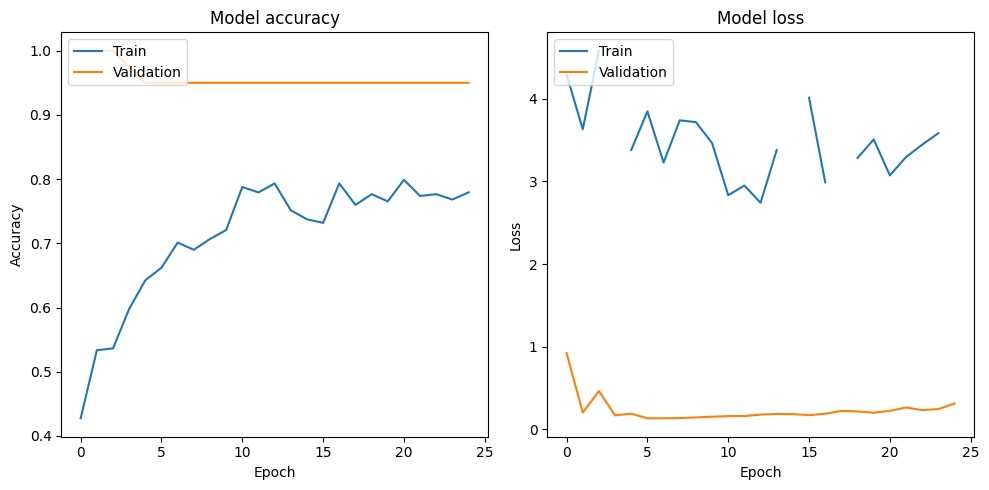

4/4 [==============================] - 0s 28ms/step - loss: 1.1527 - accuracy: 0.8077
Test Loss: 1.1527
Test Accuracy: 0.8077


In [172]:
import matplotlib.pyplot as plt

# Plotting learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

# Evaluate accuracy on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


In [173]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Assuming you have calculated the evaluation metrics

# Calculating precision, recall, F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average=None, labels=range(num_classes))
class_metrics = {
    'Class': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

# Creating a DataFrame for class-wise metrics
class_metrics_df = pd.DataFrame(class_metrics)

# Calculating overall metrics
overall_precision, overall_recall, overall_f1_score, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')
overall_metrics = {
    'Overall Precision': [overall_precision],
    'Overall Recall': [overall_recall],
    'Overall F1-Score': [overall_f1_score]
}

# Creating a DataFrame for overall metrics
overall_metrics_df = pd.DataFrame(overall_metrics)

# Displaying the tables
print("Class-wise Metrics:")
print(class_metrics_df)

print("\nOverall Metrics:")
print(overall_metrics_df)




Class-wise Metrics:
            Class  Precision    Recall  F1-Score
0  CURRENT SMOKER   0.533333  0.727273  0.615385
1      NON-SMOKER   0.928571  0.812500  0.866667
2     PAST SMOKER   0.538462  0.636364  0.583333
3          SMOKER   0.000000  0.000000  0.000000
4         UNKNOWN   0.967742  0.952381  0.960000

Overall Metrics:
   Overall Precision  Overall Recall  Overall F1-Score
0           0.842448        0.846154          0.841659


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
